# Task 0: Extracting the dataset from the matlab files

In [1]:
import scipy.io as sio

# Load the data
training_5 = sio.loadmat('training_data_5.mat')
training_6 = sio.loadmat('training_data_6.mat')
testing_5 = sio.loadmat('testing_data_5.mat')
testing_6 = sio.loadmat('testing_data_6.mat')

print("The keys of the training and testing data are:")
print(training_5.keys())
print(training_6.keys())
print(testing_5.keys())
print(testing_6.keys())
print("\n")

# Extract the data
training_5_data = training_5['train_data_5']
training_6_data = training_6['train_data_6']
testing_5_data = testing_5['test_data_5']
testing_6_data = testing_6['test_data_6']

print(f"The shapes of the training data of 5 is: {training_5_data.shape}")
print(f"The shapes of the training data of 6 is: {training_6_data.shape}")
print(f"The shapes of the testing data of 5 is: {testing_5_data.shape}")
print(f"The shapes of the testing data of 6 is: {testing_6_data.shape}")
print("\n")


# Vectorize the data
training_5_data_vector = training_5_data.reshape(-1, 784)
training_6_data_vector = training_6_data.reshape(-1, 784)
testing_5_data_vector = testing_5_data.reshape(-1, 784)
testing_6_data_vector = testing_6_data.reshape(-1, 784)

print(f"The shapes of the vectorized training data of 5 is: {training_5_data_vector.shape}")
print(f"The shapes of the vectorized training data of 6 is: {training_6_data_vector.shape}")
print(f"The shapes of the vectorized testing data of 5 is: {testing_5_data_vector.shape}")
print(f"The shapes of the vectorized testing data of 6 is: {testing_6_data_vector.shape}")

The keys of the training and testing data are:
dict_keys(['__header__', '__version__', '__globals__', 'train_data_5'])
dict_keys(['__header__', '__version__', '__globals__', 'train_data_6'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data_5'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data_6'])


The shapes of the training data of 5 is: (5421, 28, 28)
The shapes of the training data of 6 is: (5918, 28, 28)
The shapes of the testing data of 5 is: (892, 28, 28)
The shapes of the testing data of 6 is: (958, 28, 28)


The shapes of the vectorized training data of 5 is: (5421, 784)
The shapes of the vectorized training data of 6 is: (5918, 784)
The shapes of the vectorized testing data of 5 is: (892, 784)
The shapes of the vectorized testing data of 6 is: (958, 784)


# Task 1: Feature Normalization (Data Conditioning)

In [2]:
import numpy as np

# Training data
# Combine training samples for digits 5 and 6
combined_training_sample = np.concatenate((training_5_data_vector, training_6_data_vector), axis=0)

# Calculate the mean and standard deviation for each feature from the combined training sample
mean_training = combined_training_sample.mean(axis=0)
std_training = combined_training_sample.std(axis=0)

std_training[std_training == 0] = 1e-5

# Normalize the training samples for digits 5 and 6
training_5_sample_normalized = (training_5_data_vector - mean_training) / std_training
training_6_sample_normalized = (training_6_data_vector - mean_training) / std_training

# Testing data
# Combine testing samples for digits 5 and 6
combined_testing_sample = np.concatenate((testing_5_data_vector, testing_6_data_vector), axis=0)

# Calculate the mean and standard deviation for each feature from the combined testing data
mean_testing = combined_testing_sample.mean(axis=0)
std_testing = combined_testing_sample.std(axis=0)

std_testing[std_testing == 0] = 1e-5

# Normalize the testing samples for digits 5 and 6
testing_5_sample_normalized = (testing_5_data_vector - mean_testing) / std_testing
testing_6_sample_normalized = (testing_6_data_vector - mean_testing) / std_testing

print(f"The shapes of the normalized training sample for 5 is: {training_5_sample_normalized.shape}")
print(f"The shapes of the normalized training sample for 6 is: {training_6_sample_normalized.shape}")
print(f"The shapes of the normalized testing sample for 5 is: {testing_5_sample_normalized.shape}")
print(f"The shapes of the normalized testing sample for 6 is: {testing_6_sample_normalized.shape}")

The shapes of the normalized training sample for 5 is: (5421, 784)
The shapes of the normalized training sample for 6 is: (5918, 784)
The shapes of the normalized testing sample for 5 is: (892, 784)
The shapes of the normalized testing sample for 6 is: (958, 784)


# Task 2: PCA using the training sample.

In [3]:
import numpy as np

# Combine the normalized training samples for digits 5 and 6
combined_training_sample_normalized = np.concatenate((training_5_sample_normalized, training_6_sample_normalized), axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(combined_training_sample_normalized, rowvar=False)

# Perform eigenanalysis to find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[eigenvalue_indices]
eigenvectors = eigenvectors[:, eigenvalue_indices]

# Select the first two Principal Components
selected_eigenvalues = eigenvalues[:2]
selected_eigenvectors = eigenvectors[:, :2]

# Project the normalized training samples onto the first two Principal Components
projected_data = np.dot(combined_training_sample_normalized, selected_eigenvectors)

print(f"The selected eigenvalues are: {selected_eigenvalues}")
print(f"The shape of the projected data is: {projected_data.shape}")

The selected eigenvalues are: [51.41085966 42.16025548]
The shape of the projected data is: (11339, 2)


# Task 3: Dimension reduction using PCA

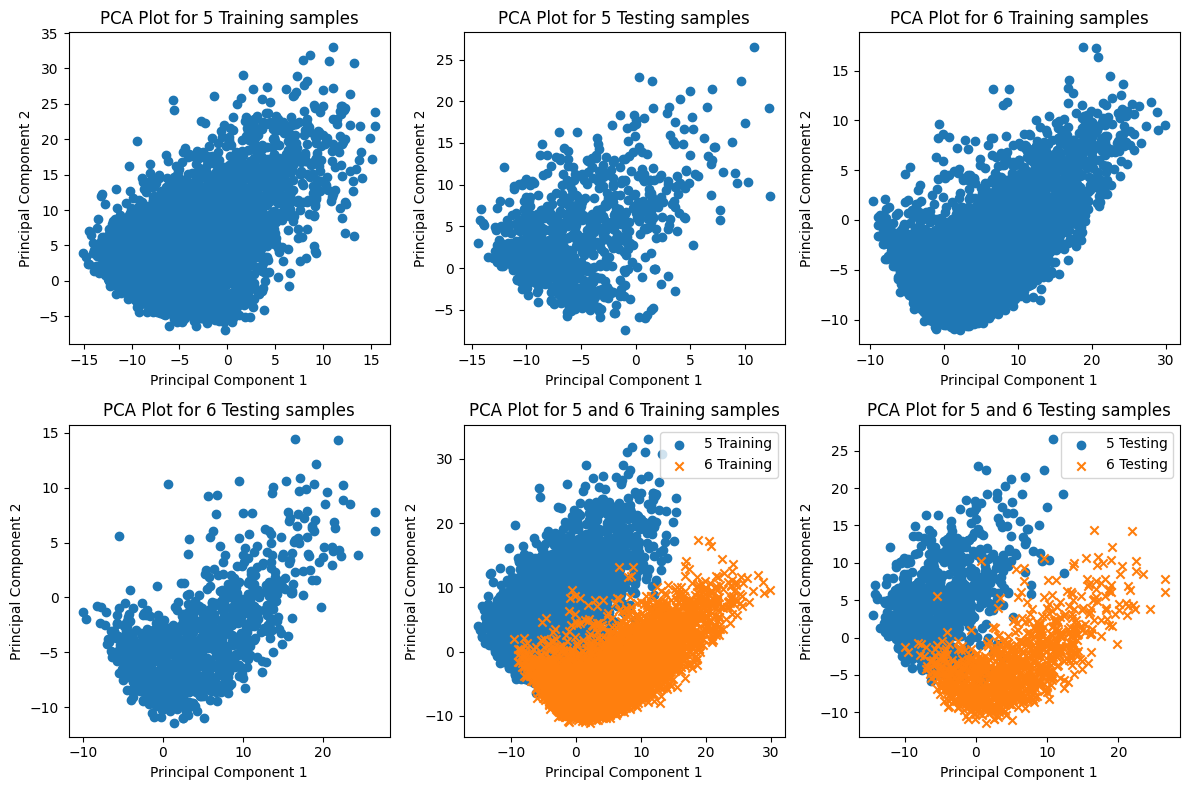

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Combine the normalized testing samples for digits 5 and 6
combined_testing_sample_normalized = np.concatenate((testing_5_sample_normalized, testing_6_sample_normalized), axis=0)

# Project the training and testing samples onto the 2-D feature space
projected_training_sample = np.dot(combined_training_sample_normalized, selected_eigenvectors)
projected_testing_sample = np.dot(combined_testing_sample_normalized, selected_eigenvectors)

# Split the projected data into 5 and 6 classes for training and testing
projected_training_5 = projected_training_sample[:5421]
projected_training_6 = projected_training_sample[5421:]
projected_testing_5 = projected_testing_sample[:892]
projected_testing_6 = projected_testing_sample[892:]

# Create PCA plots
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.scatter(projected_training_5[:, 0], projected_training_5[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 5 Training samples')

plt.subplot(232)
plt.scatter(projected_testing_5[:, 0], projected_testing_5[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 5 Testing samples')

plt.subplot(233)
plt.scatter(projected_training_6[:, 0], projected_training_6[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 6 Training samples')

plt.subplot(234)
plt.scatter(projected_testing_6[:, 0], projected_testing_6[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 6 Testing samples')

plt.subplot(235)
plt.scatter(projected_training_5[:, 0], projected_training_5[:, 1], label='5 Training', marker='o')
plt.scatter(projected_training_6[:, 0], projected_training_6[:, 1], label='6 Training', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 5 and 6 Training samples')
plt.legend()

plt.subplot(236)
plt.scatter(projected_testing_5[:, 0], projected_testing_5[:, 1], label='5 Testing', marker='o')
plt.scatter(projected_testing_6[:, 0], projected_testing_6[:, 1], label='6 Testing', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 5 and 6 Testing samples')
plt.legend()

plt.tight_layout()
plt.show()


# Task 4: Density Estimation

Mean for projected training samples of digit 5 is: [-4.45320748  4.06951377]
Mean for projected training samples of digit 6 is: [ 4.07922233 -3.72775171]
Covariance matrix for projected training samples of digit 5 is: [[23.39792743 15.13683929]
 [15.13683929 36.44222332]]
Covariance matrix for projected training samples of digit 6 is: [[42.26796632 17.9467385 ]
 [17.9467385  18.33394357]]


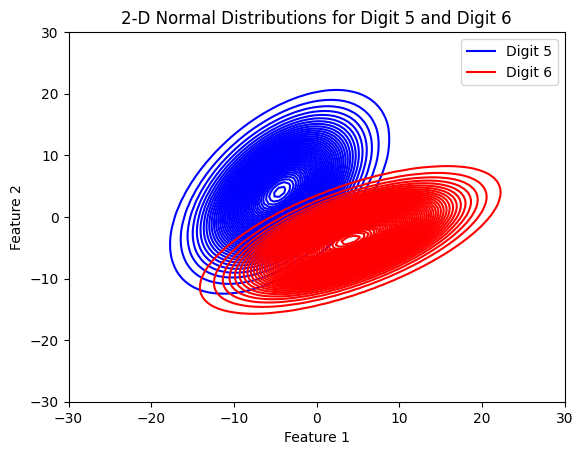

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Calculate the mean and covariance matrix for projected training samples of digits 5 and 6
mean_training_for_5 = np.mean(projected_training_5, axis=0)
mean_training_for_6 = np.mean(projected_training_6, axis=0)

covariance_matrix_for_5 = np.cov(projected_training_5, rowvar=False)
covariance_matrix_for_6 = np.cov(projected_training_6, rowvar=False)

print(f"Mean for projected training samples of digit 5 is: {mean_training_for_5}")
print(f"Mean for projected training samples of digit 6 is: {mean_training_for_6}")
print(f"Covariance matrix for projected training samples of digit 5 is: {covariance_matrix_for_5}")
print(f"Covariance matrix for projected training samples of digit 6 is: {covariance_matrix_for_6}")


x, y = np.meshgrid(np.linspace(-30, 30, 100), np.linspace(-30, 30, 100))
pos = np.dstack((x, y))

# Create a 2-D normal distribution for digits 5 and 6
normal_distribution_for_5 = multivariate_normal(mean=mean_training_for_5, cov=covariance_matrix_for_5)
normal_distribution_for_6 = multivariate_normal(mean=mean_training_for_6, cov=covariance_matrix_for_6)

# Calculate the probability density at each point on the feature space
probability_density_function_for_5 = normal_distribution_for_5.pdf(pos)
probability_density_function_for_6 = normal_distribution_for_6.pdf(pos)

# Create contour plots
contour1 = plt.contour(x, y, probability_density_function_for_5, levels=50, colors='blue')
contour2 = plt.contour(x, y, probability_density_function_for_6, levels=50, colors='red')

legend_labels = ['Digit 5', 'Digit 6']
legend_proxies = [plt.Line2D([0], [0], linestyle='-', color='blue'),
                  plt.Line2D([0], [0], linestyle='-', color='red')]

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2-D Normal Distributions for Digit 5 and Digit 6')
plt.legend(legend_proxies, legend_labels)

plt.show()

# Task 5: Bayesian decision theory for optimal classification

In [6]:
from scipy.stats import multivariate_normal

# Function to classify samples using Bayesian Decision Theory with multivariate Gaussian likelihood.ing
def bayesian_decision_theory(dataset, probability_density_function_for_5, probability_density_function_for_6):

    # Calculate the likelihood of the sample under each multivariate Gaussian distribution
    likelihood_for_5 = probability_density_function_for_5.pdf(dataset)
    likelihood_for_6 = probability_density_function_for_6.pdf(dataset)

    # Prior probabilities (given in the project description)
    prior_5 = 0.5
    prior_6 = 0.5

    # Calculate the posterior probabilities
    posterior_probability_for_5 = (likelihood_for_5 * prior_5)
    posterior_probability_for_6 = (likelihood_for_6 * prior_6)

    # Declare the decision rules
    if posterior_probability_for_5 > posterior_probability_for_6:
        return 5
    else:
        return 6

# Create multivariate Gaussian distributions for digits 5 and 6
multivariate_distribution_5 = multivariate_normal(mean=mean_training_for_5, cov=covariance_matrix_for_5)
multivariate_distribution_6 = multivariate_normal(mean=mean_training_for_6, cov=covariance_matrix_for_6)

# Classify the training data using Bayesian Decision Theory
correct_training = 0
for dataset in projected_training_5:
    if bayesian_decision_theory(dataset, multivariate_distribution_5, multivariate_distribution_6) == 5:
        correct_training += 1
for dataset in projected_training_6:
    if bayesian_decision_theory(dataset, multivariate_distribution_5, multivariate_distribution_6) == 6:
        correct_training += 1

# Classify the testing data using Bayesian Decision Theory
correct_testing = 0
for dataset in projected_testing_5:
    if bayesian_decision_theory(dataset, multivariate_distribution_5, multivariate_distribution_6) == 5:
        correct_testing += 1
for dataset in projected_testing_6:
    if bayesian_decision_theory(dataset, multivariate_distribution_5, multivariate_distribution_6) == 6:
        correct_testing += 1

# Calculate accuracy for classifying training and testing samples.
total_training = len(projected_training_5) + len(projected_training_6)
total_testing = len(projected_testing_5) + len(projected_testing_6)

accuracy_training = correct_training / total_training
accuracy_testing = correct_testing / total_testing

print(f"Accuracy for the classification of training samples: {accuracy_training:.2%}")
print(f"Accuracy for the classification of testing samples: {accuracy_testing:.2%}")



Accuracy for the classification of training samples: 94.28%
Accuracy for the classification of testing samples: 93.95%
